In [9]:
import pandas as pd
df = pd.read_csv('bikebuyers_original.csv')
df

,ID,Marital Status,Gender,Income,Children,Cars,Age,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,40000,0,1,42,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,70000,0,1,38,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,70000,0,1,43,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,60000,4,3,42,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,60000,3,2,66,Bachelors,Management,No,1-2 Miles,North America,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14798,Single,Female,10000,4,2,41,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
996,16259,Single,Female,10000,4,2,40,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
997,16410,Single,Female,10000,4,2,41,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
998,28957,Single,Female,120000,0,4,34,Partial High School,Professional,Yes,10+ Miles,Pacific,Yes


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
# Create a crosstab for Commute Distance and Purchased Bike
crosstab_cd_pb = pd.crosstab(df['Commute Distance'], df['Purchased Bike'])
crosstab_cd_pb


Purchased Bike,No,Yes
Commute Distance,,
0-1 Miles,166,200
1-2 Miles,92,77
10+ Miles,78,33
2-5 Miles,67,95
5-10 Miles,116,76


In [11]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab_cd_pb)
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-square Statistic: 34.51174860650463
P-value: 5.85155978472953e-07


The crosstab analysis between commute distance and bike purchases shows some interesting trends. It appears that customers with shorter commute distances, like those who travel "0-1 Miles" or "2-5 Miles," are more likely to purchase a bike compared to those with longer commutes, such as "10+ Miles." This pattern suggests that shorter commutes might make biking a more practical and appealing option for some customers. 

The chi-square test supports this observation, with a statistic of 34.51 and a very low p-value of 5.85e-07. Since this p-value is below the 0.001 threshold, we can conclude that there is a statistically significant relationship between commute distance and the likelihood of buying a bike. This result suggests that commute distance could be an influential factor in customers’ decisions. People with shorter commutes may see biking as a feasible alternative, increasing the chances they’ll choose to buy a bike.

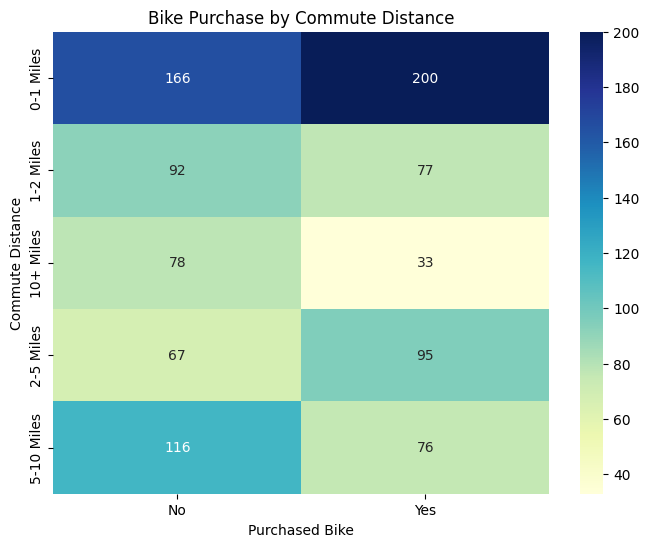

In [5]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_cd_pb, annot=True, cmap="YlGnBu", fmt="d", cbar=True)
plt.title('Bike Purchase by Commute Distance')
plt.xlabel('Purchased Bike')
plt.ylabel('Commute Distance')
plt.show()


The heatmap visually emphasizes this pattern, with darker colors for higher counts of bike purchases among those who live closer (e.g., "0-1 Miles" and "2-5 Miles"). This suggests that promoting bikes to customers who live closer to work may be an effective strategy.

In [6]:
# Cross-tabulation for Marital Status and Purchased Bike
crosstab_ms_pb = pd.crosstab(df['Marital Status'], df['Purchased Bike'])
crosstab_ms_pb


Purchased Bike,No,Yes
Marital Status,,
Married,307,232
Single,212,249


In [7]:
# Chi-square test for Marital Status and Purchased Bike
chi2, p, dof, expected = chi2_contingency(crosstab_ms_pb)
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-square Statistic: 11.54350337632292
P-value: 0.0006798640659811607


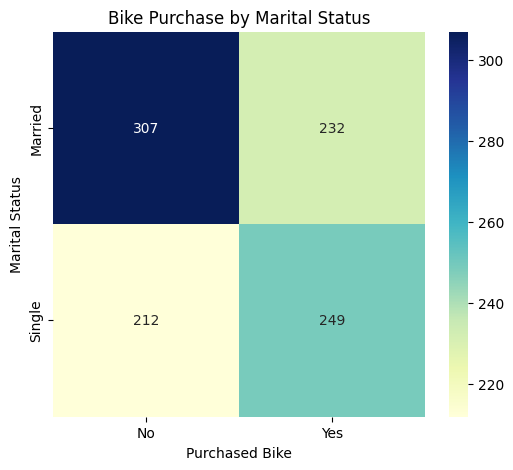

In [8]:
# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(crosstab_ms_pb, annot=True, cmap="YlGnBu", fmt="d", cbar=True)
plt.title('Bike Purchase by Marital Status')
plt.xlabel('Purchased Bike')
plt.ylabel('Marital Status')
plt.show()
